# Input data

Text(0, 0.5, 'Second feature')

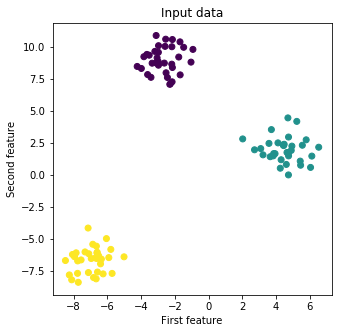

In [26]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(random_state = 42)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (75, 2)
Shape of test data: (25, 2)


# Neural network training

In [93]:
# Архитектура 2-3-3

# Начальные веса после входного слоя
w1 = np.array([[-0.5, 0.2, 0.4], 
               [-0.3, -0.6, 0.8]])

# Начальные веса перед выходным слоем
w2 = np.array([[-0.4, 0.6, -0.4],
               [-0.5, 0.7, -0.3],
               [-0.3, 0.5, -0.2]])

# Функция активации
def activation_function(data):
    return 1 / (1 + np.exp(-data))

# Расчет ответа сети
def forward_propagation(input_data):
    
    # Between input and hidden layer
    net_on_hidden_layer = np.dot(input_data, w1)
    y_on_hidden_layer = activation_function(net_on_hidden_layer)
    
    # Between hidden and output layer
    net_on_output_layer = np.dot(y_on_hidden_layer, w2)
    y_on_output_layer = activation_function(net_on_output_layer)

    return y_on_output_layer

# Корректировка весов
def back_propagation(y_predicted, y_true):
    
    if y == 0: y_true_output = [1, 0, 0] 
    elif y == 1: y_true_output = [0, 1, 0] 
    else: y_true_output = [0, 0, 1] 
    error = y_true - y_predicted
    
    return error

y_pred = forward_propagation(X_train[0])
error = back_propagation(y_pred, y[0])
print(error)

[-0.30324303 -0.76922161 -0.34113881]


In [87]:
import pandas as pd
y_pred = y_test

np_resuts = np.array([y_test, y_pred])
data_pd = pd.DataFrame(np_resuts, index=['y_test', 'y_pred'], columns = y_pred)
display(data_pd)

,1,0,0,2,2,1,2,0,2,0,...,2,2,0,2,1,0,2,1,2,1
y_test,1,0,0,2,2,1,2,0,2,0,...,2,2,0,2,1,0,2,1,2,1
y_pred,1,0,0,2,2,1,2,0,2,0,...,2,2,0,2,1,0,2,1,2,1


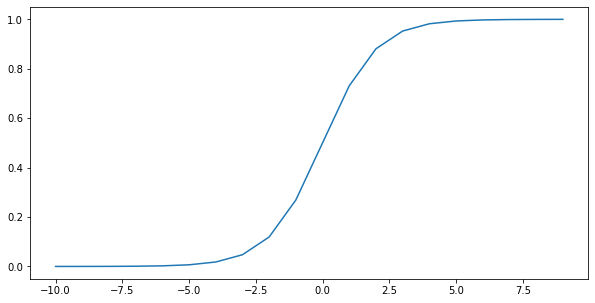

In [86]:
x = []
y = []
for i in range(-10,10,1):
    x.append(i)
    y.append(activation_function(i))

plt.figure(figsize=(10,5))
plt.plot(x,y)